# Linear regression to predict future production of honey

Investigate current honey production and predict future honey production using the 'Honey Production in the USA (1998-2012)' dataset, downloaded from Kaggle.

link to dataset: https://www.kaggle.com/jessicali9530/honey-production

## Import modules

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

## Import and inspect data

In [40]:
df = pd.read_csv('honeyproduction.csv')

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## View honey production per year for years included in dataset

In [41]:
# calculate mean production per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

# transform production column to show values in millions
prod_per_year['totalprod_millions'] = prod_per_year['totalprod'] / 1000000
prod_per_year = prod_per_year.drop(columns=['totalprod'])

prod_per_year

,year,totalprod_millions
0,1998,5.105093
1,1999,4.706674
2,2000,5.106000
3,2001,4.221545
4,2002,3.892386
5,2003,4.122091
6,2004,4.456805
7,2005,4.243146
8,2006,3.761902
9,2007,3.600512


In [42]:
# define X as 'year' column
X = prod_per_year['year']

In [43]:
# reshape X
X = X.values.reshape(-1, 1)

In [44]:
# define y as 'totalprod' column
y = prod_per_year['totalprod_millions']

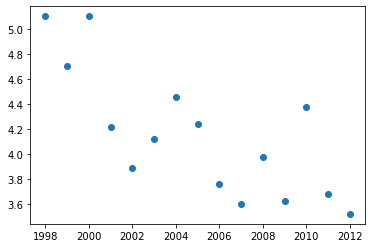

In [54]:
plt.scatter(X,y)

In [60]:
prod_1998 = prod_per_year['totalprod_millions'][0]
prod_2012 = prod_per_year['totalprod_millions'][14]

prod_change = (prod_2012 - prod_1998) / prod_1998

Honey production has been on the decline over the time period represented in the dataset. Production declined by 30% between 1998 and 2012.

## Create linear regression model

In [46]:
# create linear regression model
regr = linear_model.LinearRegression()

In [47]:
# fit model
regr.fit(X,y)

# print slope
print(regr.coef_[0])

# print intercept
print(regr.intercept_)

-0.08830318915238194
181.2080831073298


In [48]:
# predict y values
y_predict = regr.predict(X)

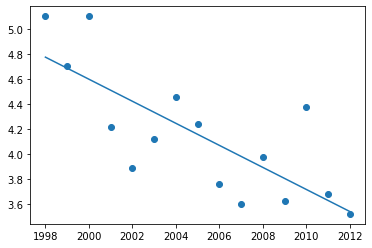

In [49]:
plt.clf()
plt.scatter(X,y)
plt.plot(X, y_predict)

## Use linear regression model to predict future honey production

In [51]:
# define list of years 2013 - 2051
nums = np.array(range(2013, 2051))

# reshape list of years
X_future = nums.reshape(-1, 1)

In [52]:
# use regression model to predict y-values for future years
future_predict = regr.predict(X_future)

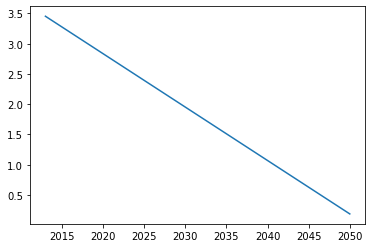

In [53]:
plt.clf()
plt.plot(X_future, future_predict)

In [63]:
# identify predicted production in 2050
prod_2050 = future_predict[-1]

In [65]:
prod_change_98_50 = (prod_2050 - prod_1998) / prod_1998
prod_change_98_50

-0.9634589724228302

If honey production continues to decline according to the trend predicted  by the linear regression model, production will decline to 0.18M by 2050 - a 96% decrease from production levels in 1998.